# Bienvenidos al notebook de la práctica 3
---

## Miembros del equipo

- Alejandro Guerrero Álvarez
- Carlos Flores Vara
- Juan Pablo Jimenez Salazar
- Armando Guzmán Ramírez

## Parte 1

Importen todos los módulos necesarios en esta sección

In [22]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from wordcloud import WordCloud
from matplotlib import pyplot as plt


### Descripción:

En este desafío, se nos asigna la tarea de analizar reseñas relacionadas con varios productos de una tienda en línea. El conjunto de datos proporcionado contiene 15,000 textos de reseñas junto con el sentimiento correspondiente para cada reseña. Nuestro objetivo es ayudar al equipo de publicidad de la empresa a crear una visualización de nube de palabras enfocándose específicamente en los adjetivos utilizados en las reseñas con sentimientos positivos.

Hagan una sola función que se encargue de normalizar las reviews, esto es:
1. Convertir a minúsculas
2. Remover puntuación
3. Remover stopwords
4. Tokenizar por palabra

In [23]:
data = pd.read_csv('e:/Users/Liz/Documents/Excel/CSV/reviews.csv')

In [24]:
def normalizar(df):
    p_v = stopwords.words("english")
    for i in range(len(df)):
        # Lower
        df.at[i, 'Review'] = df.at[i, 'Review'].lower()

        # Punctuation
        df.at[i, 'Review'] = re.sub(r"\W"," ",df.at[i, 'Review'])
        df.at[i, 'Review'] = re.sub(r"\s+", " ", df.at[i, 'Review'])

        # Token
        df.at[i, 'Review'] = nltk.word_tokenize(df.at[i, 'Review'])

        #stop words
        df.at[i, 'Review'] = [w for w in df.at[i, 'Review'] if w not in p_v]

    return df

In [25]:
data = normalizar(data)
data.head()

,Sentiment,Review
0,Positive,"[wonderfully, engaging, tale, bugliosi, succes..."
1,Positive,"[charles, manson, part, american, conscience, ..."
2,Positive,"[helter, skelter, motive, little, far, real, r..."
3,Negative,"[permissive, issues, could, ban, photos, crock..."
4,Positive,"[16, years, old, summer, 1969, remember, vivid..."


Filtren solo las filas donde el sentimiento es `Positive` 

In [26]:
def filtrar(df, filterBy):
    dropThese = []
    for i in range(len(df)):
        if df.at[i, 'Sentiment'] != filterBy:
            dropThese.append(i)
    
    if(dropThese != []):
        return df.drop(index=dropThese).reset_index(drop=True)
    else:
        return df

In [27]:
data = filtrar(data, 'Positive')
data.head()

,Sentiment,Review
0,Positive,"[wonderfully, engaging, tale, bugliosi, succes..."
1,Positive,"[charles, manson, part, american, conscience, ..."
2,Positive,"[helter, skelter, motive, little, far, real, r..."
3,Positive,"[16, years, old, summer, 1969, remember, vivid..."
4,Positive,"[idea, manson, family, much, widespread, one, ..."


Usen `nltk.pos_tag` para etiquetar las POS en las reviews

In [28]:
# SU CÓDIGO...
def tagging(df):
    df['Review'] = df['Review'].apply(nltk.pos_tag)
    return df

In [29]:
tagging(data)

,Sentiment,Review
0,Positive,"[(wonderfully, RB), (engaging, VBG), (tale, JJ..."
1,Positive,"[(charles, NNS), (manson, VBP), (part, NN), (a..."
2,Positive,"[(helter, NN), (skelter, NN), (motive, JJ), (l..."
3,Positive,"[(16, CD), (years, NNS), (old, JJ), (summer, N..."
4,Positive,"[(idea, NN), (manson, VBD), (family, NN), (muc..."
...,...,...
7944,Positive,"[(great, JJ), (comic, JJ), (catch, NN), (free,..."
7945,Positive,"[(loved, VBN), (series, NN), (younger, NN), (f..."
7946,Positive,"[(thanos, NNS), (collects, NNS), (six, CD), (i..."
7947,Positive,"[(set, NN), (stories, NNS), (definitely, RB), ..."


In [30]:
data.at[0, 'Review']

[('wonderfully', 'RB'),
 ('engaging', 'VBG'),
 ('tale', 'JJ'),
 ('bugliosi', 'NNS'),
 ('successfully', 'RB'),
 ('prosecuted', 'VBD'),
 ('manson', 'JJ'),
 ('family', 'NN'),
 ('august', 'NN'),
 ('1969', 'CD'),
 ('murders', 'NNS'),
 ('however', 'RB'),
 ('wish', 'VBP'),
 ('learn', 'VBP'),
 ('lot', 'NN'),
 ('backgrounds', 'NNS'),
 ('family', 'NN'),
 ('members', 'NNS'),
 ('book', 'NN'),
 ('book', 'NN'),
 ('law', 'NN'),
 ('enforcement', 'NN'),
 ('point', 'NN'),
 ('view', 'NN'),
 ('pick', 'VBP'),
 ('book', 'NN'),
 ('hoping', 'NN'),
 ('learn', 'JJ'),
 ('manson', 'NN'),
 ('philosophy', 'NN'),
 ('disappointed', 'VBD'),
 ('however', 'RB'),
 ('want', 'VBP'),
 ('know', 'JJ'),
 ('players', 'NNS'),
 ('implicated', 'VBD'),
 ('prosecuted', 'JJ'),
 ('better', 'RBR'),
 ('book', 'NN')]

Extraer los adjetivos donde las reviews tienen un sentimiento positivo

In [31]:
def getAdj(df):
    df['Adjectives'] = None
    fullList = []
    for i in range(len(df)):
        extractedAdjectives = []
        for word in data.at[i, 'Review']:
            if(word[1] == 'JJ'):
                extractedAdjectives.append(word)
                fullList.append(word)
        data.at[i, 'Adjectives'] = extractedAdjectives
    return [df, fullList]

In [32]:
wordsGotten = getAdj(data)[1]
wordsGotten

[('tale', 'JJ'),
 ('manson', 'JJ'),
 ('learn', 'JJ'),
 ('know', 'JJ'),
 ('prosecuted', 'JJ'),
 ('american', 'JJ'),
 ('aware', 'JJ'),
 ('scary', 'JJ'),
 ('tried', 'JJ'),
 ('sure', 'JJ'),
 ('bugliosi', 'JJ'),
 ('good', 'JJ'),
 ('background', 'JJ'),
 ('murderous', 'JJ'),
 ('spree', 'JJ'),
 ('key', 'JJ'),
 ('senseless', 'JJ'),
 ('bugliosi', 'JJ'),
 ('exhaustive', 'JJ'),
 ('true', 'JJ'),
 ('give', 'JJ'),
 ('read', 'JJ'),
 ('ultimate', 'JJ'),
 ('true', 'JJ'),
 ('motive', 'JJ'),
 ('real', 'JJ'),
 ('gary', 'JJ'),
 ('old', 'JJ'),
 ('first', 'JJ'),
 ('first', 'JJ'),
 ('many', 'JJ'),
 ('stays', 'JJ'),
 ('many', 'JJ'),
 ('hot', 'JJ'),
 ('strange', 'JJ'),
 ('front', 'JJ'),
 ('frykowski', 'JJ'),
 ('unborn', 'JJ'),
 ('bugliosi', 'JJ'),
 ('thank', 'JJ'),
 ('unremorseful', 'JJ'),
 ('widespread', 'JJ'),
 ('mr', 'JJ'),
 ('great', 'JJ'),
 ('various', 'JJ'),
 ('informative', 'JJ'),
 ('detective', 'JJ'),
 ('diabolocal', 'JJ'),
 ('shield', 'JJ'),
 ('horrrid', 'JJ'),
 ('forthright', 'JJ'),
 ('personal', 'JJ')

Creen una word cloud para visualizar todos los adjetivos en las reviews positivas

In [33]:
def getWordCloud(words):
    wordsToUse = ''
    for word in words:
        wordsToUse += f"{word[0]} "

    wc = WordCloud(height = 500, width = 500, background_color='white')

    wc.generate(wordsToUse)
    plt.imshow(wc)
    plt.axis('off')
    plt.show()


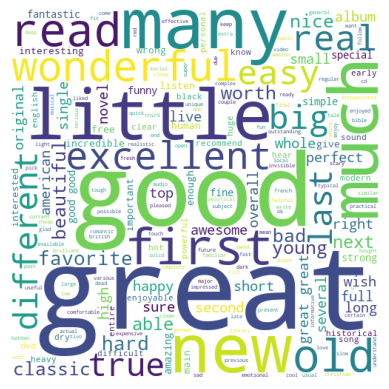

In [34]:
getWordCloud(wordsGotten)

In [35]:
def practica3(df, filterBy):
    dfCopy = df.copy()
    dfCopy = normalizar(dfCopy)
    print(filterBy)
    dfCopy = filtrar(dfCopy, filterBy)
    print(dfCopy)
    tagging(dfCopy)
    wordsGottenF = getAdj(dfCopy)[1]
    getWordCloud(wordsGottenF)

Positive
     Sentiment                                             Review
0     Positive  [wonderfully, engaging, tale, bugliosi, succes...
1     Positive  [charles, manson, part, american, conscience, ...
2     Positive  [helter, skelter, motive, little, far, real, r...
3     Positive  [16, years, old, summer, 1969, remember, vivid...
4     Positive  [idea, manson, family, much, widespread, one, ...
...        ...                                                ...
7944  Positive  [great, comic, catch, free, time, carried, min...
7945  Positive  [loved, series, younger, first, came, great, s...
7946  Positive  [thanos, collects, six, infinity, gems, become...
7947  Positive  [set, stories, definitely, among, best, works,...
7948  Positive  [book, takes, thought, takes, patience, takes,...

[7949 rows x 2 columns]


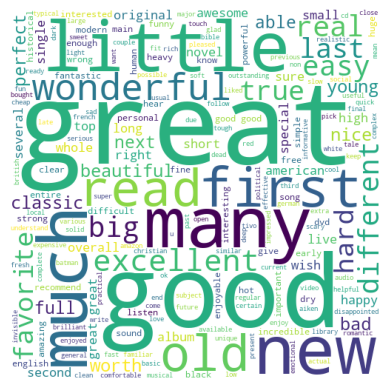

In [36]:
data2 = pd.read_csv('e:/Users/Liz/Documents/Excel/CSV/reviews.csv')
practica3(data2, 'Positive')

---
## Parte 2

Repetir todos los pasos anteriores, pero para las reviews negativas

Negative
     Sentiment                                             Review
0     Negative  [permissive, issues, could, ban, photos, crock...
1     Negative  [read, manson, file, obvious, control, people,...
2     Negative  [fact, matter, book, total, fiction, elaborate...
3     Negative  [realize, first, book, person, come, searching...
4     Negative  [bugliosi, ghost, writer, one, crafted, skillf...
...        ...                                                ...
7047  Negative  [like, thought, anthologies, series, ok, bothe...
7048  Negative  [love, 1632, series, bought, every, book, soon...
7049  Negative  [say, becoming, immersed, 1632, enjoying, 1633...
7050  Negative  [every, single, ring, fire, book, general, ser...
7051  Negative  [love, rof, series, love, politics, intrigue, ...

[7052 rows x 2 columns]


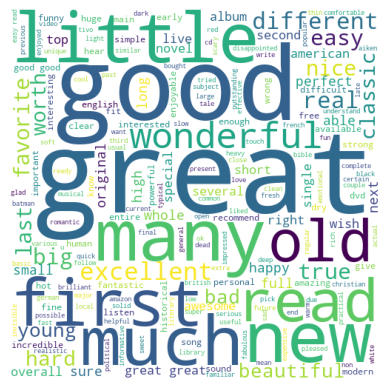

In [37]:
# SU CÓDIGO...
data3 = pd.read_csv('e:/Users/Liz/Documents/Excel/CSV/reviews.csv')
practica3(data3, 'Negative')